# Introduction
Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.
Through this project, we came up with a way of how to strategically identify the best neighborhood in Pittsburgh. Being that there are multiple ways to interpret what's considered the "best", we interpreted this in terms of safety (crims, disasters) and stability (income). This is because for a neighborhood to be considered a quality place to live, it must be safe and stable. (finish intro)

# The Metric
Describe your metric, and what features are you measuring. What datasets are you using?
We are measuring the total number of arrests, fire incidents, and income for each neighborhood in Pittsburgh given the following datasets:
* police_arrest.csv
    * https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f 
* Fire Incidencts.csv
    * https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02 
* income.csv
    * link to site
* income_individual.csv
    * link to site

Based on all of these datasets, we gather information specifically regarding the neighborhoods given the metrics we chose.

## The Data
### Arrests

In [17]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#import data
arrests = pd.read_csv('police_arrest.csv', index_col='_id')
arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [21]:
#parse and organize data
arrests = arrests[arrests['INCIDENTNEIGHBORHOOD'] != 'Outside City']
arrests = arrests.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='ARRESTS')
arrests = arrests.set_index('INCIDENTNEIGHBORHOOD')
arrests = arrests.sort_values('ARRESTS')
arrests

,ARRESTS
INCIDENTNEIGHBORHOOD,
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Ridgemont,37
...,...
Homewood South,2090
East Allegheny,2217
Carrick,2352


Text(0.5, 1.0, 'Police Arrest Records by Neighborhood')

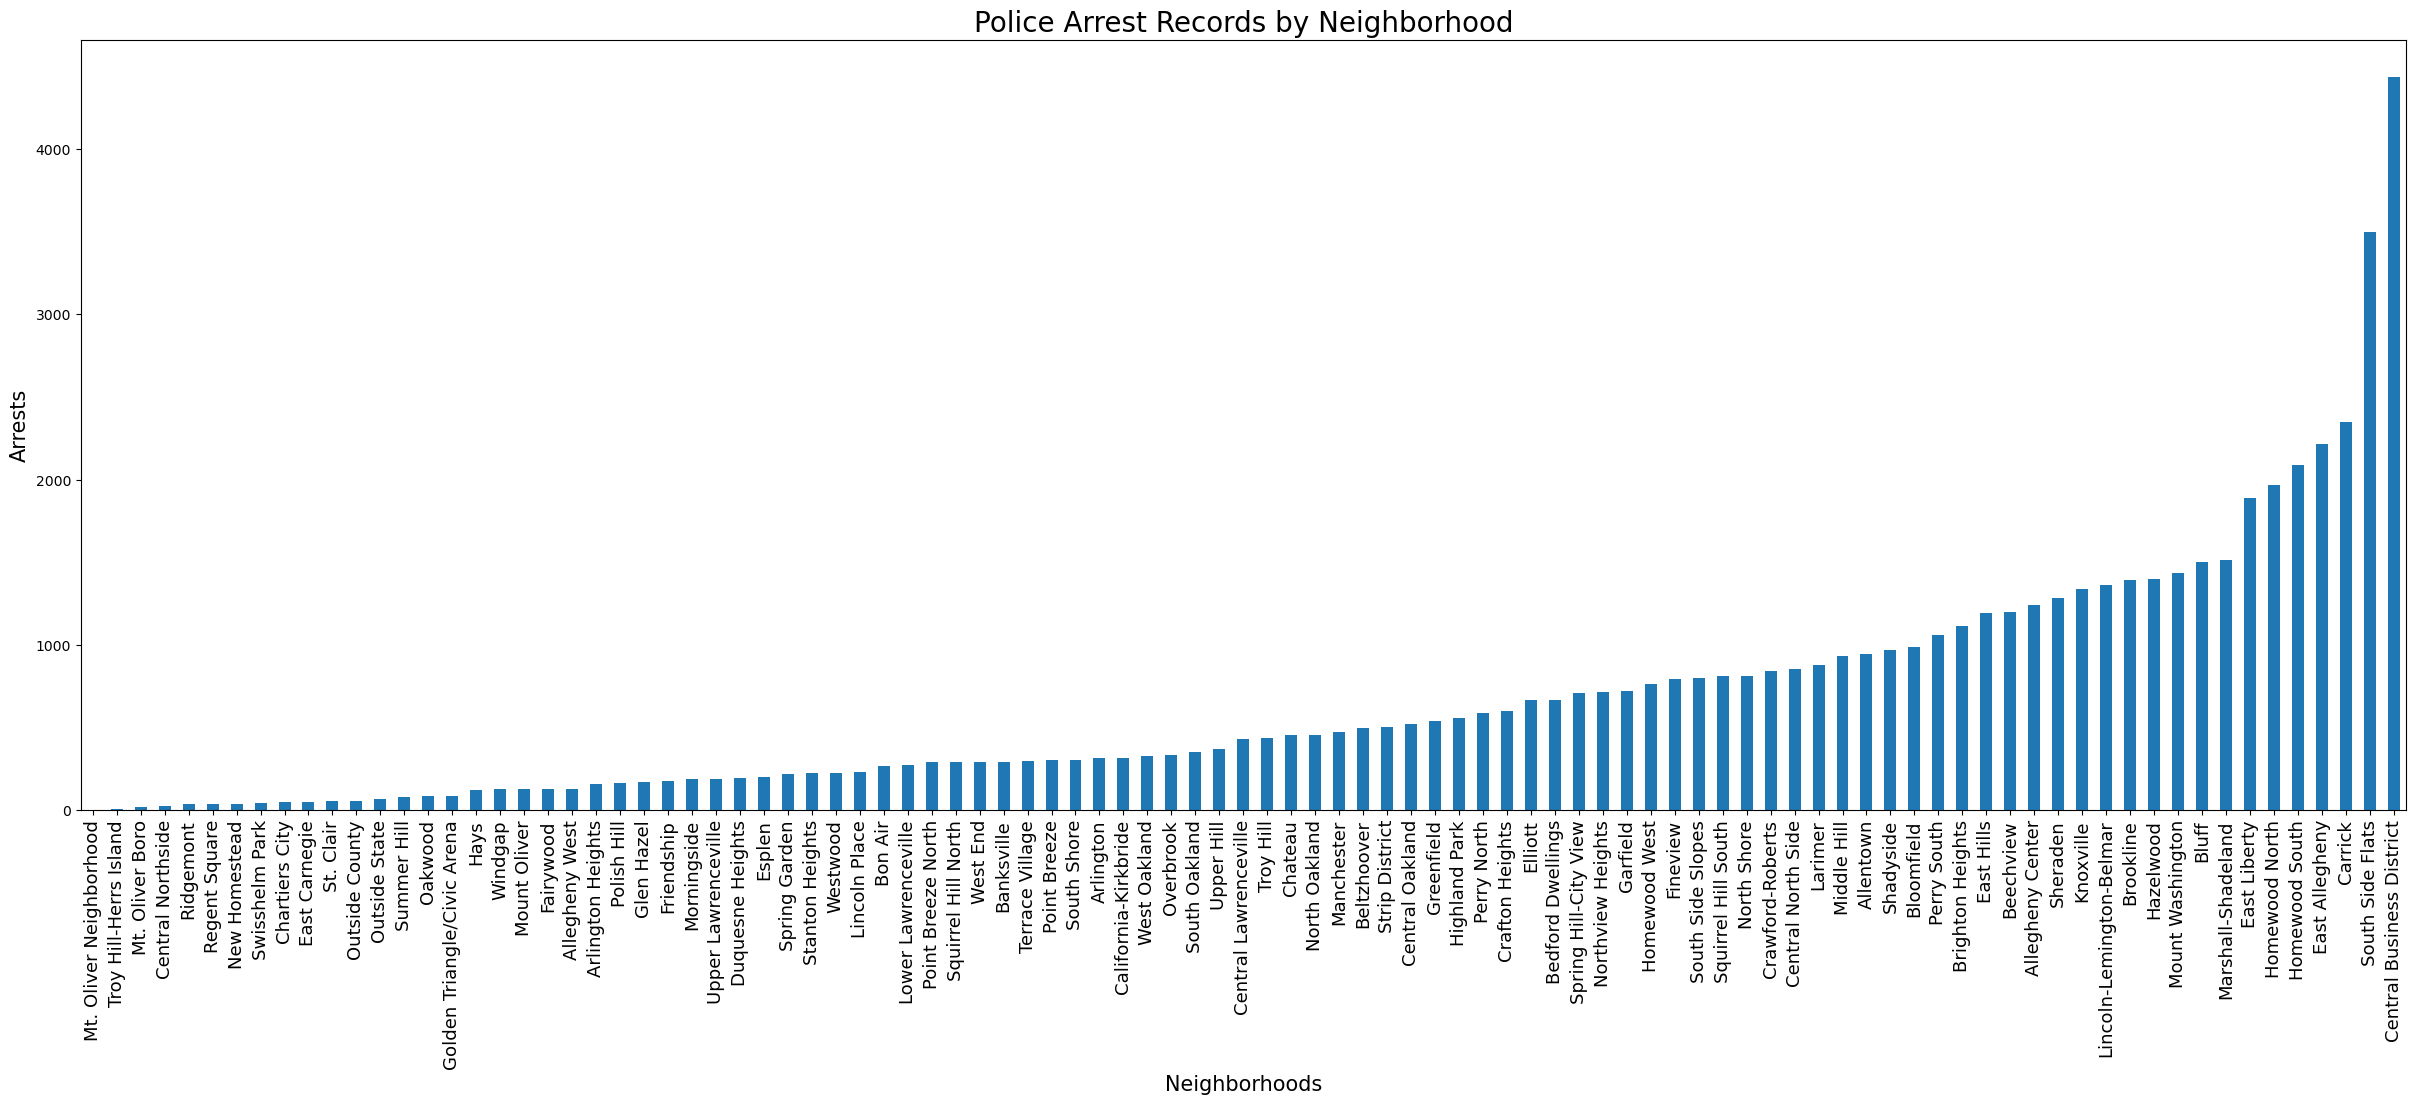

In [23]:
#plot data
arrests['ARRESTS'].plot.bar(figsize=(30, 10), width=0.5)
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Arrests', fontsize=15)
plt.title('Police Arrest Records by Neighborhood', fontsize=20)

### Fire Incidents

In [25]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#import data
file_path = 'Fire Incidents.csv'
data = pd.read_csv(file_path)
data.head() #looking at first few elements of the complete data

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [27]:
#parse and organize data

#separate by neighborhood
data = data.groupby("neighborhood").size().reset_index(name="Fire Incidents")
data = data.sort_values("Fire Incidents") #sort neighborhoods in lowest fire incidents to highest
data = data.set_index("neighborhood") #set right column name index to be neighborhood
print(data) #print results

                           Fire Incidents
neighborhood                             
Mount Oliver Borough                    6
Regent Square                           9
East Carnegie                          11
Ridgemont                              12
Mt. Oliver                             12
...                                   ...
Hazelwood                             257
Squirrel Hill South                   267
South Side Flats                      288
Central Business District             289
Carrick                               307

[91 rows x 1 columns]


Text(0.5, 1.0, 'Fire Incidents by Neighborhood')

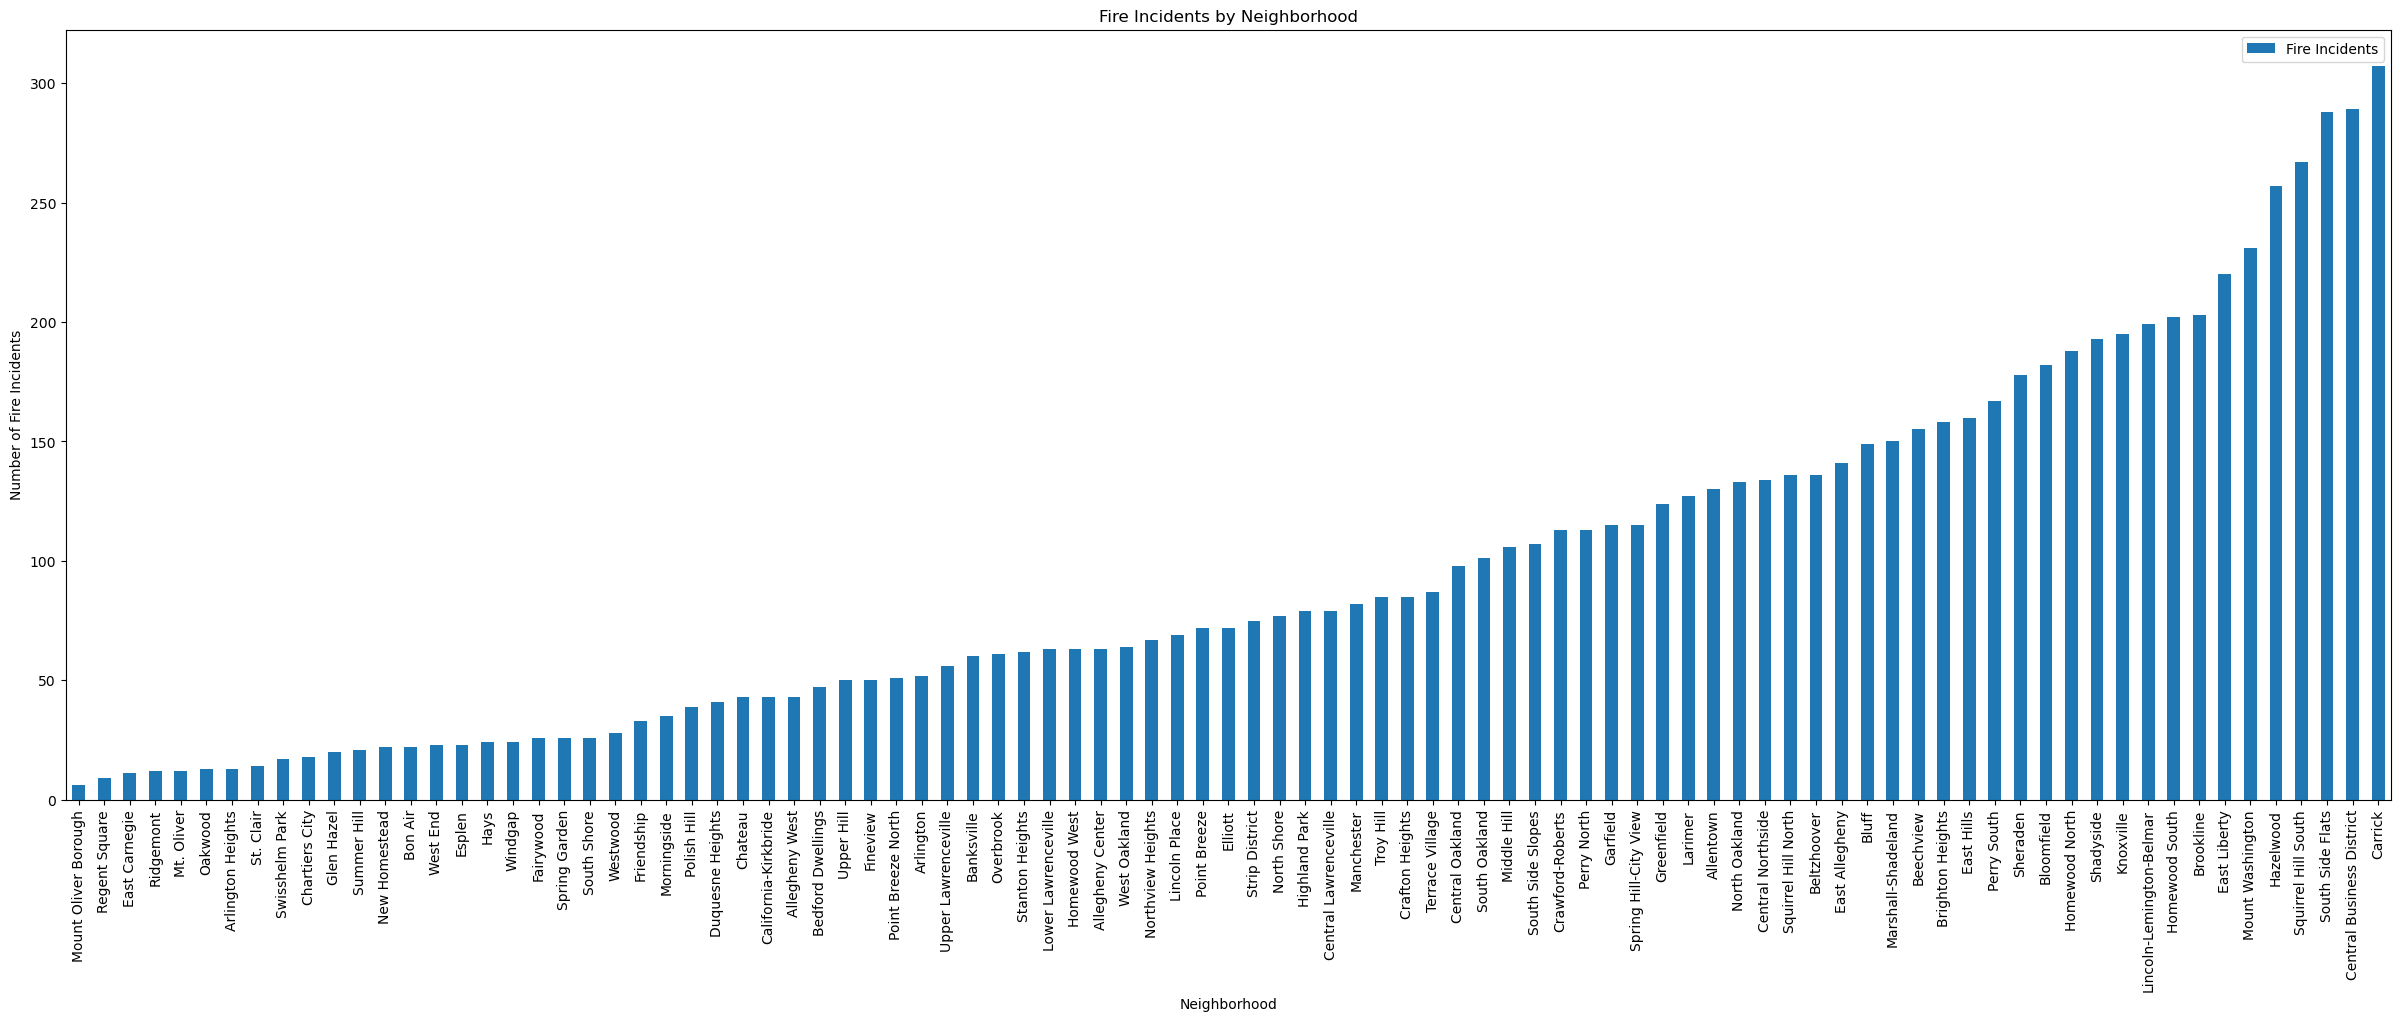

In [28]:
#plot data
#creating a visual graph for the data

#set up the bar graph
data.plot.bar(figsize=(30,10), width=0.5)

#adding labels and titles to the graph
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')
plt.title('Fire Incidents by Neighborhood')

### Income

In [34]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [35]:
#import data
income = pd.read_csv('income.csv')
income

,_id,Neighborhood,Id,estimate__aggregate_household_income_in_the_past_12_months__,margin_of_error__aggregate_household_income_in_the_past_12_m
0,1,Allegheny Center,1,28265700,8176700
1,2,Allegheny West,2,23755400,15159354
2,3,Allentown,3,40566300,8358735.28
3,4,Arlington,4,33111400,6248592.971
4,5,Arlington Heights,5,2515000,1056475
...,...,...,...,...,...
86,87,Upper Lawrenceville,87,60604600,14808774.52
87,88,West End,88,4884400,2447655
88,89,West Oakland,89,15820400,3620802.954
89,90,Westwood,90,90594300,11234701.15


In [36]:
#parse data
income = income.rename(columns={
    'estimate__aggregate_household_income_in_the_past_12_months__': 'Total_income',
    'margin_of_error__aggregate_household_income_in_the_past_12_m': 'Margin_of_error'
})
income = income[['Neighborhood', 'Total_income', 'Margin_of_error']]
income = income[income['Total_income'] != '-']
income['Total_income'] = pd.to_numeric(income['Total_income'])
income['Margin_of_error'] = pd.to_numeric(income['Margin_of_error'])
income

,Neighborhood,Total_income,Margin_of_error
0,Allegheny Center,28265700,8176700.00
1,Allegheny West,23755400,15159354.00
2,Allentown,40566300,8358735.28
3,Arlington,33111400,6248592.97
4,Arlington Heights,2515000,1056475.00
...,...,...,...
86,Upper Lawrenceville,60604600,14808774.52
87,West End,4884400,2447655.00
88,West Oakland,15820400,3620802.95
89,Westwood,90594300,11234701.15


In [41]:
#import individual's income data
individuals = pd.read_csv('income_individual.csv')
individuals

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,1,Allegheny Center,1,733.00,103.00,462.00,94.00,271.00,87.00
1,2,Allegheny West,2,150.00,46.00,120.00,40.00,30.00,26.00
2,3,Allentown,3,1138.00,152.75,772.00,146.77,366.00,109.39
3,4,Arlington,4,685.00,105.37,566.00,104.59,119.00,44.45
4,5,Arlington Heights,5,170.00,69.00,96.00,58.00,74.00,52.00
...,...,...,...,...,...,...,...,...,...
86,87,Upper Lawrenceville,87,1262.00,144.10,937.00,138.11,325.00,110.06
87,88,West End,88,120.00,59.00,99.00,57.00,21.00,19.00
88,89,West Oakland,89,592.00,89.11,371.00,91.55,221.00,65.80
89,90,Westwood,90,1514.00,118.83,1255.00,130.87,259.00,79.20


In [43]:
#parse data
individuals = individuals.rename(columns={
    'Estimate; Total:': 'Total_individuals',
    'Margin of Error; Total:': 'Margin_of_error'})
individuals = individuals[['Neighborhood', 'Total_individuals', 'Margin_of_error']]
individuals = individuals[individuals['Total_individuals'] > 0.0]
individuals

,Neighborhood,Total_individuals,Margin_of_error
0,Allegheny Center,733.00,103.00
1,Allegheny West,150.00,46.00
2,Allentown,1138.00,152.75
3,Arlington,685.00,105.37
4,Arlington Heights,170.00,69.00
...,...,...,...
86,Upper Lawrenceville,1262.00,144.10
87,West End,120.00,59.00
88,West Oakland,592.00,89.11
89,Westwood,1514.00,118.83


In [45]:
#standardize data
common = set(income['Neighborhood']).intersection(individuals['Neighborhood'])
income = income[income['Neighborhood'].isin(common)]
individuals = individuals[individuals['Neighborhood'].isin(common)]
print(f'Both datasets have equal length? {len(income) == len(individuals)}')

Both datasets have equal length? True


In [47]:
#calculate averages and margin of error
moe_income = income['Margin_of_error'] / income['Total_income']
moe_individuals = individuals['Margin_of_error'] / individuals['Total_individuals']
relative_moe = np.sqrt(moe_income ** 2 + moe_individuals ** 2)
average_income = income['Total_income'] / individuals['Total_individuals']
moe_average_income = relative_moe * average_income
result = pd.DataFrame({
    'Neighborhood': income['Neighborhood'],
    'Average Income': average_income,
    'Margin of Error': moe_average_income})
result = result.set_index('Neighborhood')
result = result.sort_values('Average Income', ascending=False)
result

,Average Income,Margin of Error
Neighborhood,,
Squirrel Hill North,164540.46,20748.32
Allegheny West,158369.33,112126.33
Strip District,156021.97,80139.82
Point Breeze,127711.29,15870.74
Central Business District,106215.40,28006.37
...,...,...
Northview Heights,19503.88,6964.31
Glen Hazel,17872.44,9855.83
Terrace Village,16806.45,3685.53


Text(0.5, 1.0, 'Average Income by Neighborhood with Margin of Error')

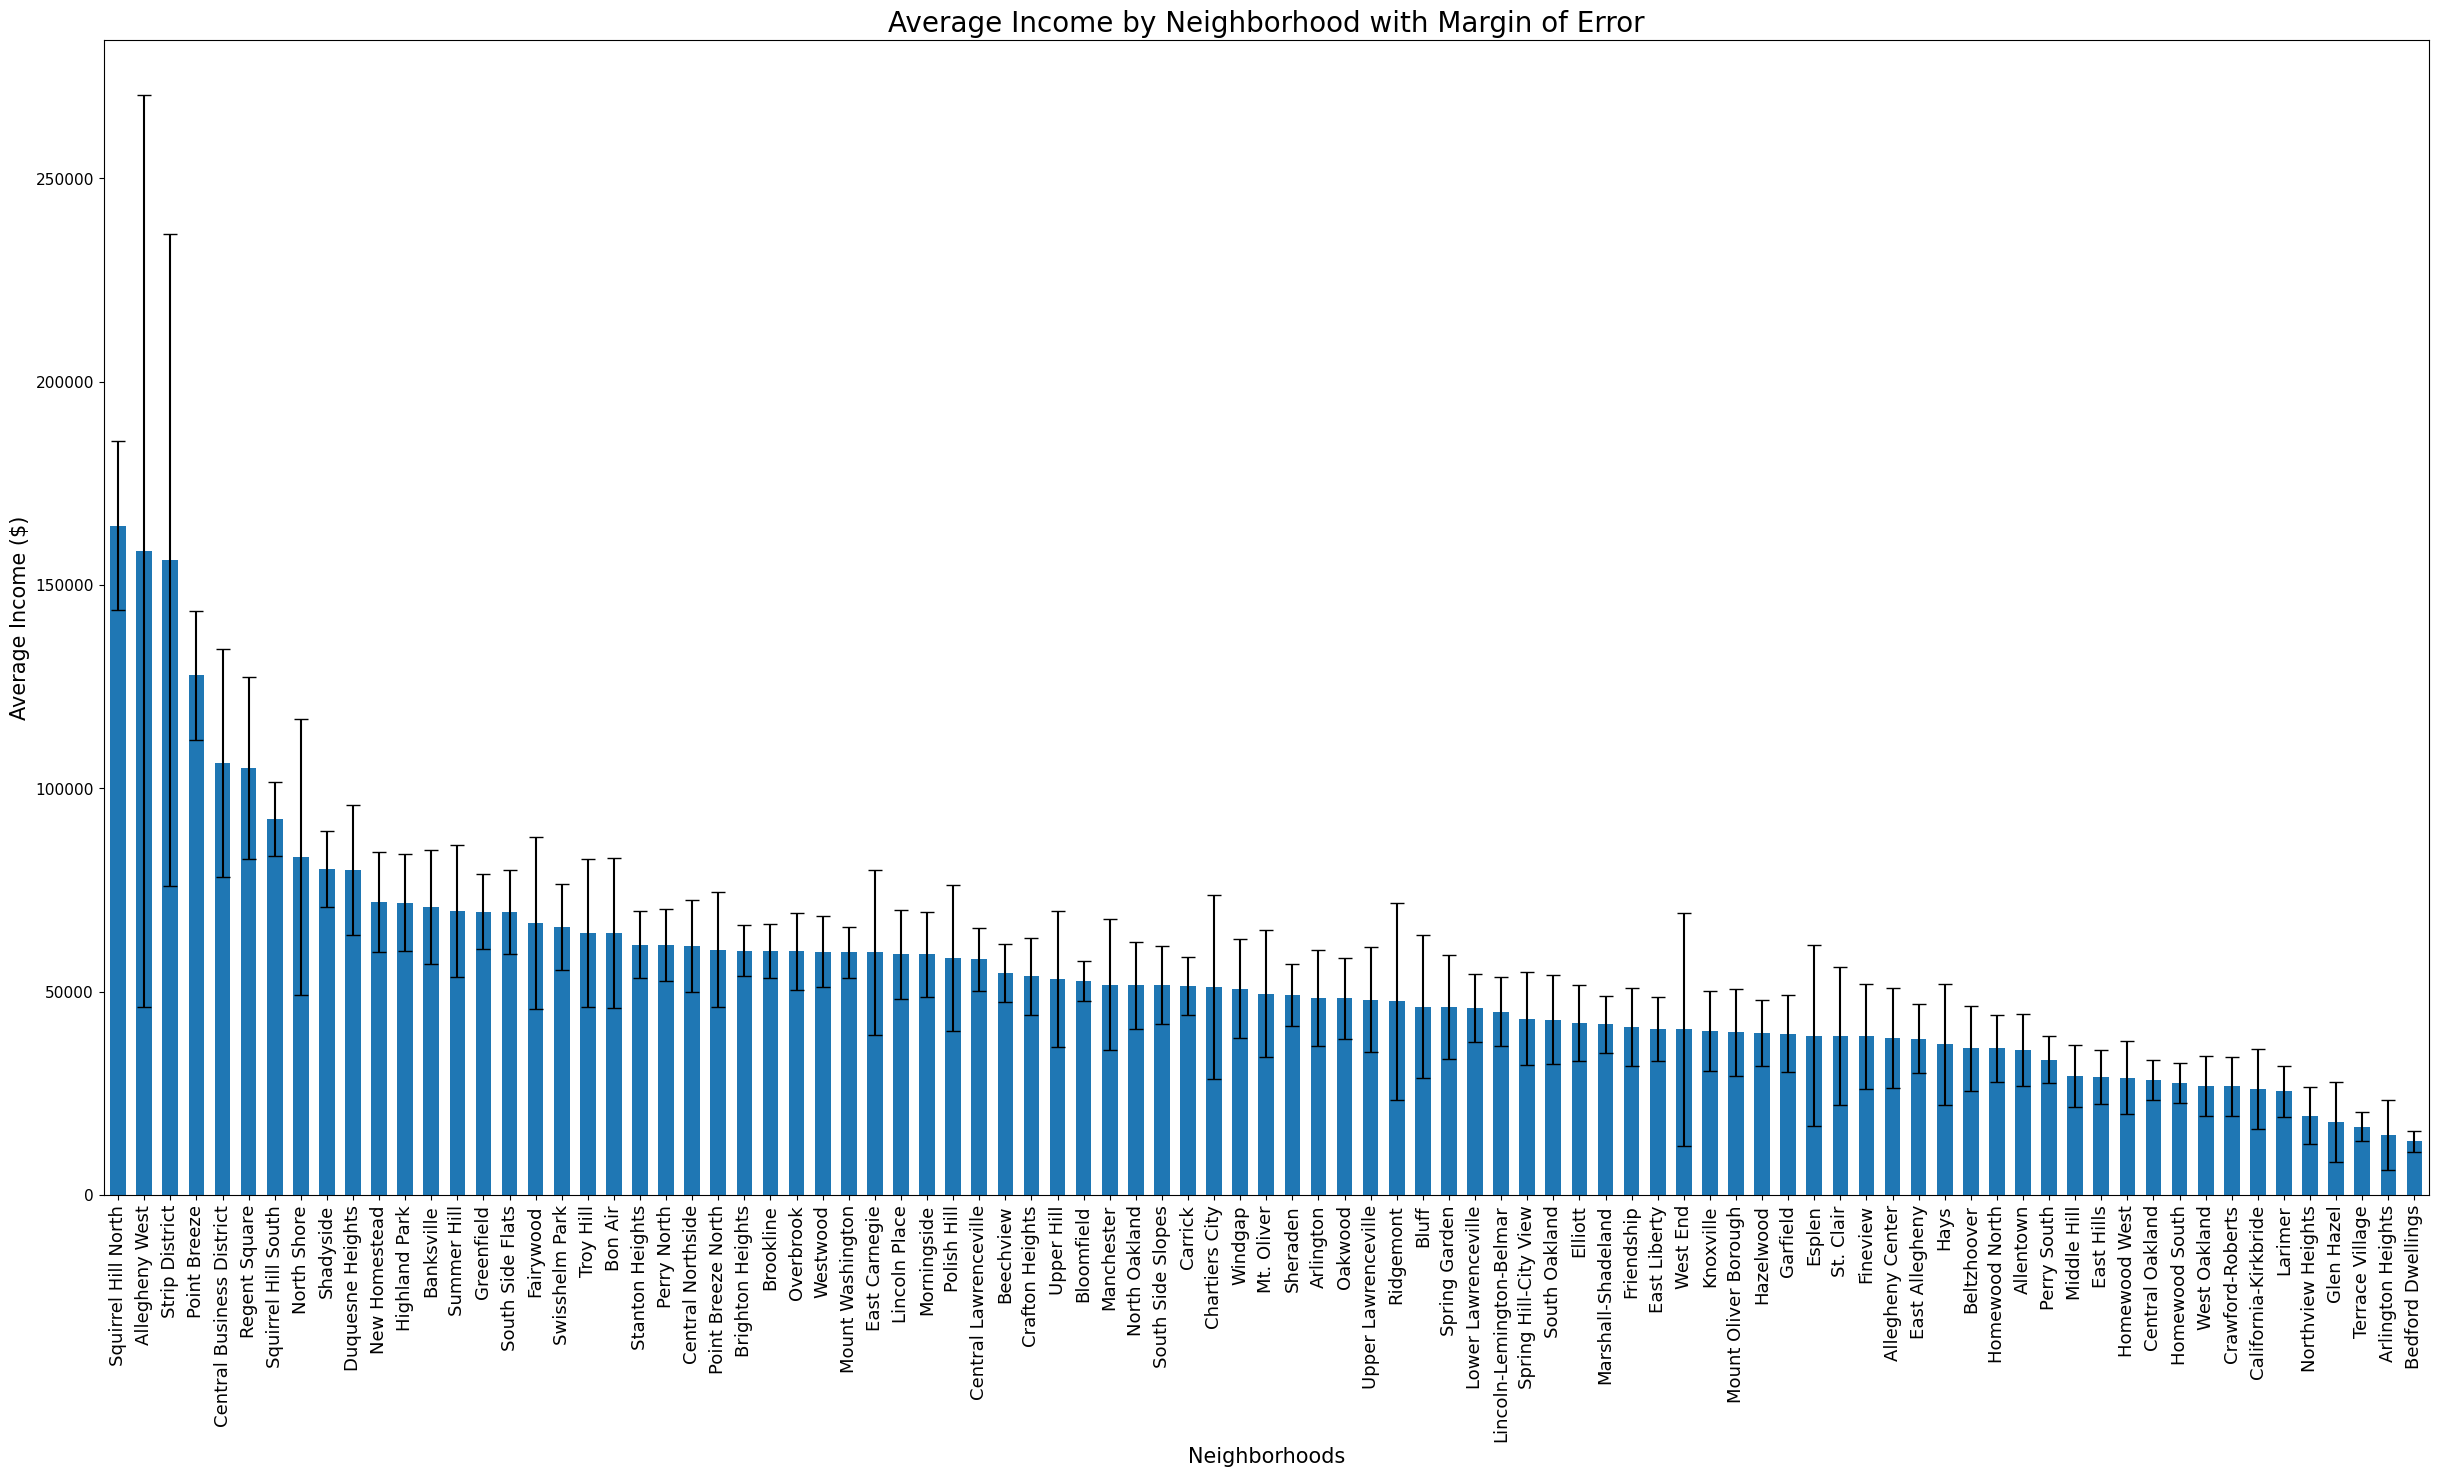

In [49]:
#plot data
result['Average Income'].plot.bar(figsize=(30, 15), width=0.6, yerr=result['Margin of Error'], capsize=5)
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Average Income ($)', fontsize=15)
plt.yticks(fontsize=11)
plt.title('Average Income by Neighborhood with Margin of Error', fontsize=20)

# The Best Neighborhood
Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data-driven argument.

# Conclusion
Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.